In [559]:
import pandas as pd
df = pd.read_excel('premiums_with_life_style.xlsx')

print(df.shape)

df.head()

(10000, 15)


,Age,Gender,Region,Marital_status,Physical_Activity,Stress_Level,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,<10L,9,No Disease,Bronze,8459
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,<10L,9,Thyroid,Silver,21685
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,10L - 25L,13,High blood pressure & Heart disease,Bronze,15984


### Format Column Names for Consistency

In [560]:
df.columns = df.columns.str.lower()

In [561]:
df.head(1)

,age,gender,region,marital_status,physical_activity,stress_level,number of dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical history,insurance_plan,annual_premium_amount
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944


In [562]:
df.columns = df.columns.str.replace(' ','_')
df.head(1)

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944


In [563]:
object_dtypes = []
for col in df.columns:
    object_dtypes.append(df[col].dtype)
set(object_dtypes) #shows the unique dtypes present in our dataset

{dtype('int64'), dtype('O')}

In [564]:
numeric_cols = df.select_dtypes('int64').columns
numeric_cols

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

In [565]:
categorical_cols = df.columns.drop(numeric_cols)
categorical_cols

Index(['gender', 'region', 'marital_status', 'physical_activity',
       'stress_level', 'bmi_category', 'smoking_status', 'employment_status',
       'income_level', 'medical_history', 'insurance_plan'],
      dtype='object')

In [566]:
for col in categorical_cols:
    print(col,': ',df[col].unique())

gender :  ['Female' 'Male']
region :  ['Southeast' 'Northeast' 'Southwest' 'Northwest']
marital_status :  ['Unmarried' 'Married']
physical_activity :  ['Medium' 'Low' 'High']
stress_level :  ['Medium' 'High' 'Low']
bmi_category :  ['Normal' 'Overweight' 'Obesity' 'Underweight']
smoking_status :  ['No Smoking' 'Occasional' 'Regular' nan]
employment_status :  ['Self-Employed' 'Freelancer' 'Salaried' nan]
income_level :  ['25L - 40L' '10L - 25L' '<10L' '> 40L' nan]
medical_history :  ['High blood pressure' 'No Disease' 'Thyroid'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid' 'Diabetes'
 'Heart disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease']
insurance_plan :  ['Gold' 'Silver' 'Bronze']


In [567]:
df['smoking_status'].value_counts()

smoking_status
No Smoking    5707
Regular       2785
Occasional    1499
Name: count, dtype: int64

##### The dataset contains no redundant values like 'Smoking = 0',etc for any of the columns, etc

In [568]:
df.duplicated().sum()

np.int64(0)

### Check for NA values

In [569]:
na_count = df.isna().sum()
na_count.max()

np.int64(18)

##### since the max no of na values is less, we can drop them

In [570]:
df = df.dropna()
df.shape

(9973, 15)

In [571]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
physical_activity        0
stress_level             0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [572]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,9973.000000,9973.000000,9973.000000,9973.000000
mean,41.319362,3.195628,23.382232,19503.816705
std,58.044687,21.679565,32.334811,8898.079736
min,18.000000,0.000000,1.000000,3582.000000
25%,24.000000,0.000000,6.000000,11774.000000
50%,37.000000,2.000000,16.000000,19314.000000
75%,50.000000,3.000000,31.000000,26500.000000
max,1178.000000,456.000000,960.000000,45854.000000


In [573]:
from matplotlib import pyplot as plt
import seaborn as sns

### Deal with Age outliers

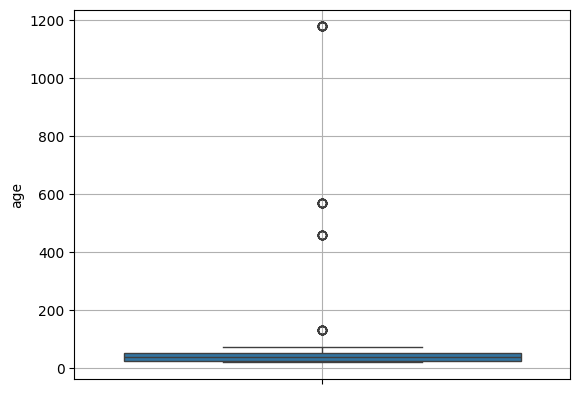

In [574]:
sns.boxplot(df.age)
plt.grid()
plt.show()

In [575]:
df[df.age>80].shape,df[df.age>100].shape,df[df.age>120].shape

((58, 15), (58, 15), (58, 15))

##### so we will consider all age values>100 as outliers

In [576]:
df = df[df.age<=100]
df.shape

(9915, 15)

In [577]:
df[df.age>100]

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount


In [578]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,9915.000000,9915.000000,9915.000000,9915.000000
mean,37.743621,3.203429,23.400807,19496.715784
std,13.975462,21.742340,32.398236,8899.088302
min,18.000000,0.000000,1.000000,3582.000000
25%,24.000000,0.000000,6.000000,11765.500000
50%,37.000000,2.000000,16.000000,19309.000000
75%,50.000000,3.000000,31.000000,26493.000000
max,72.000000,456.000000,960.000000,45854.000000


### Deal with no of dependants outlers

In [579]:
df['number_of_dependants'].unique()

array([  2,   5,   0,   3,   1,   4, 456,  78, 230])

##### we replace these outliers with the mode value

In [580]:
df = df[df['number_of_dependants']<=6]
df['number_of_dependants'].unique()

array([2, 5, 0, 3, 1, 4])

In [581]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,9868.000000,9868.000000,9868.000000,9868.000000
mean,37.756486,1.919133,23.411634,19511.417714
std,13.976822,1.503264,32.437621,8900.941540
min,18.000000,0.000000,1.000000,3582.000000
25%,24.000000,0.000000,6.000000,11776.250000
50%,37.000000,2.000000,16.000000,19327.500000
75%,50.000000,3.000000,31.000000,26505.250000
max,72.000000,5.000000,960.000000,45854.000000


### Deal with Income Lakhs outlers

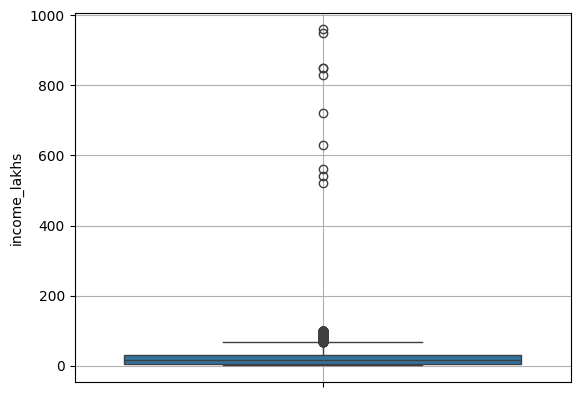

In [582]:
sns.boxplot(df.income_lakhs)
plt.grid()
plt.show()

In [583]:
def get_iqr_bounds(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

lower, upper = get_iqr_bounds(df['income_lakhs'])
lower, upper

(-31.5, 68.5)

In [584]:
df[df.income_lakhs>upper].shape

(694, 15)

##### There are many legitimate records that we will get rid of if we use IQR bounds method. Hence after discussion with business we decided to use a simple quantile bound 

In [585]:
quantile_thresold = df.income_lakhs.quantile(0.999)
quantile_thresold

np.float64(155.86000000068452)

In [586]:
df[df.income_lakhs>quantile_thresold].shape

(10, 15)

In [587]:
df = df[df.income_lakhs<=quantile_thresold].copy()
df.shape

(9858, 15)

In [588]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,9858.000000,9858.000000,9858.000000,9858.000000
mean,37.764760,1.919963,22.683709,19513.853419
std,13.976268,1.503027,22.453283,8900.593367
min,18.000000,0.000000,1.000000,3582.000000
25%,24.000000,0.000000,6.000000,11777.000000
50%,37.000000,2.000000,16.000000,19331.500000
75%,50.000000,3.000000,31.000000,26505.750000
max,72.000000,5.000000,100.000000,45854.000000


In [589]:
for col in categorical_cols:
    print(col,': ',df[col].unique())

gender :  ['Female' 'Male']
region :  ['Southeast' 'Northeast' 'Southwest' 'Northwest']
marital_status :  ['Unmarried' 'Married']
physical_activity :  ['Medium' 'Low' 'High']
stress_level :  ['Medium' 'High' 'Low']
bmi_category :  ['Normal' 'Overweight' 'Obesity' 'Underweight']
smoking_status :  ['No Smoking' 'Occasional' 'Regular']
employment_status :  ['Self-Employed' 'Freelancer' 'Salaried']
income_level :  ['25L - 40L' '10L - 25L' '<10L' '> 40L']
medical_history :  ['High blood pressure' 'No Disease' 'Thyroid'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid' 'Diabetes'
 'Heart disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease']
insurance_plan :  ['Gold' 'Silver' 'Bronze']


#### All outliers & NAs are treated

In [590]:
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'physical_activity',
       'stress_level', 'number_of_dependants', 'bmi_category',
       'smoking_status', 'employment_status', 'income_level', 'income_lakhs',
       'medical_history', 'insurance_plan', 'annual_premium_amount'],
      dtype='object')

### Histograms

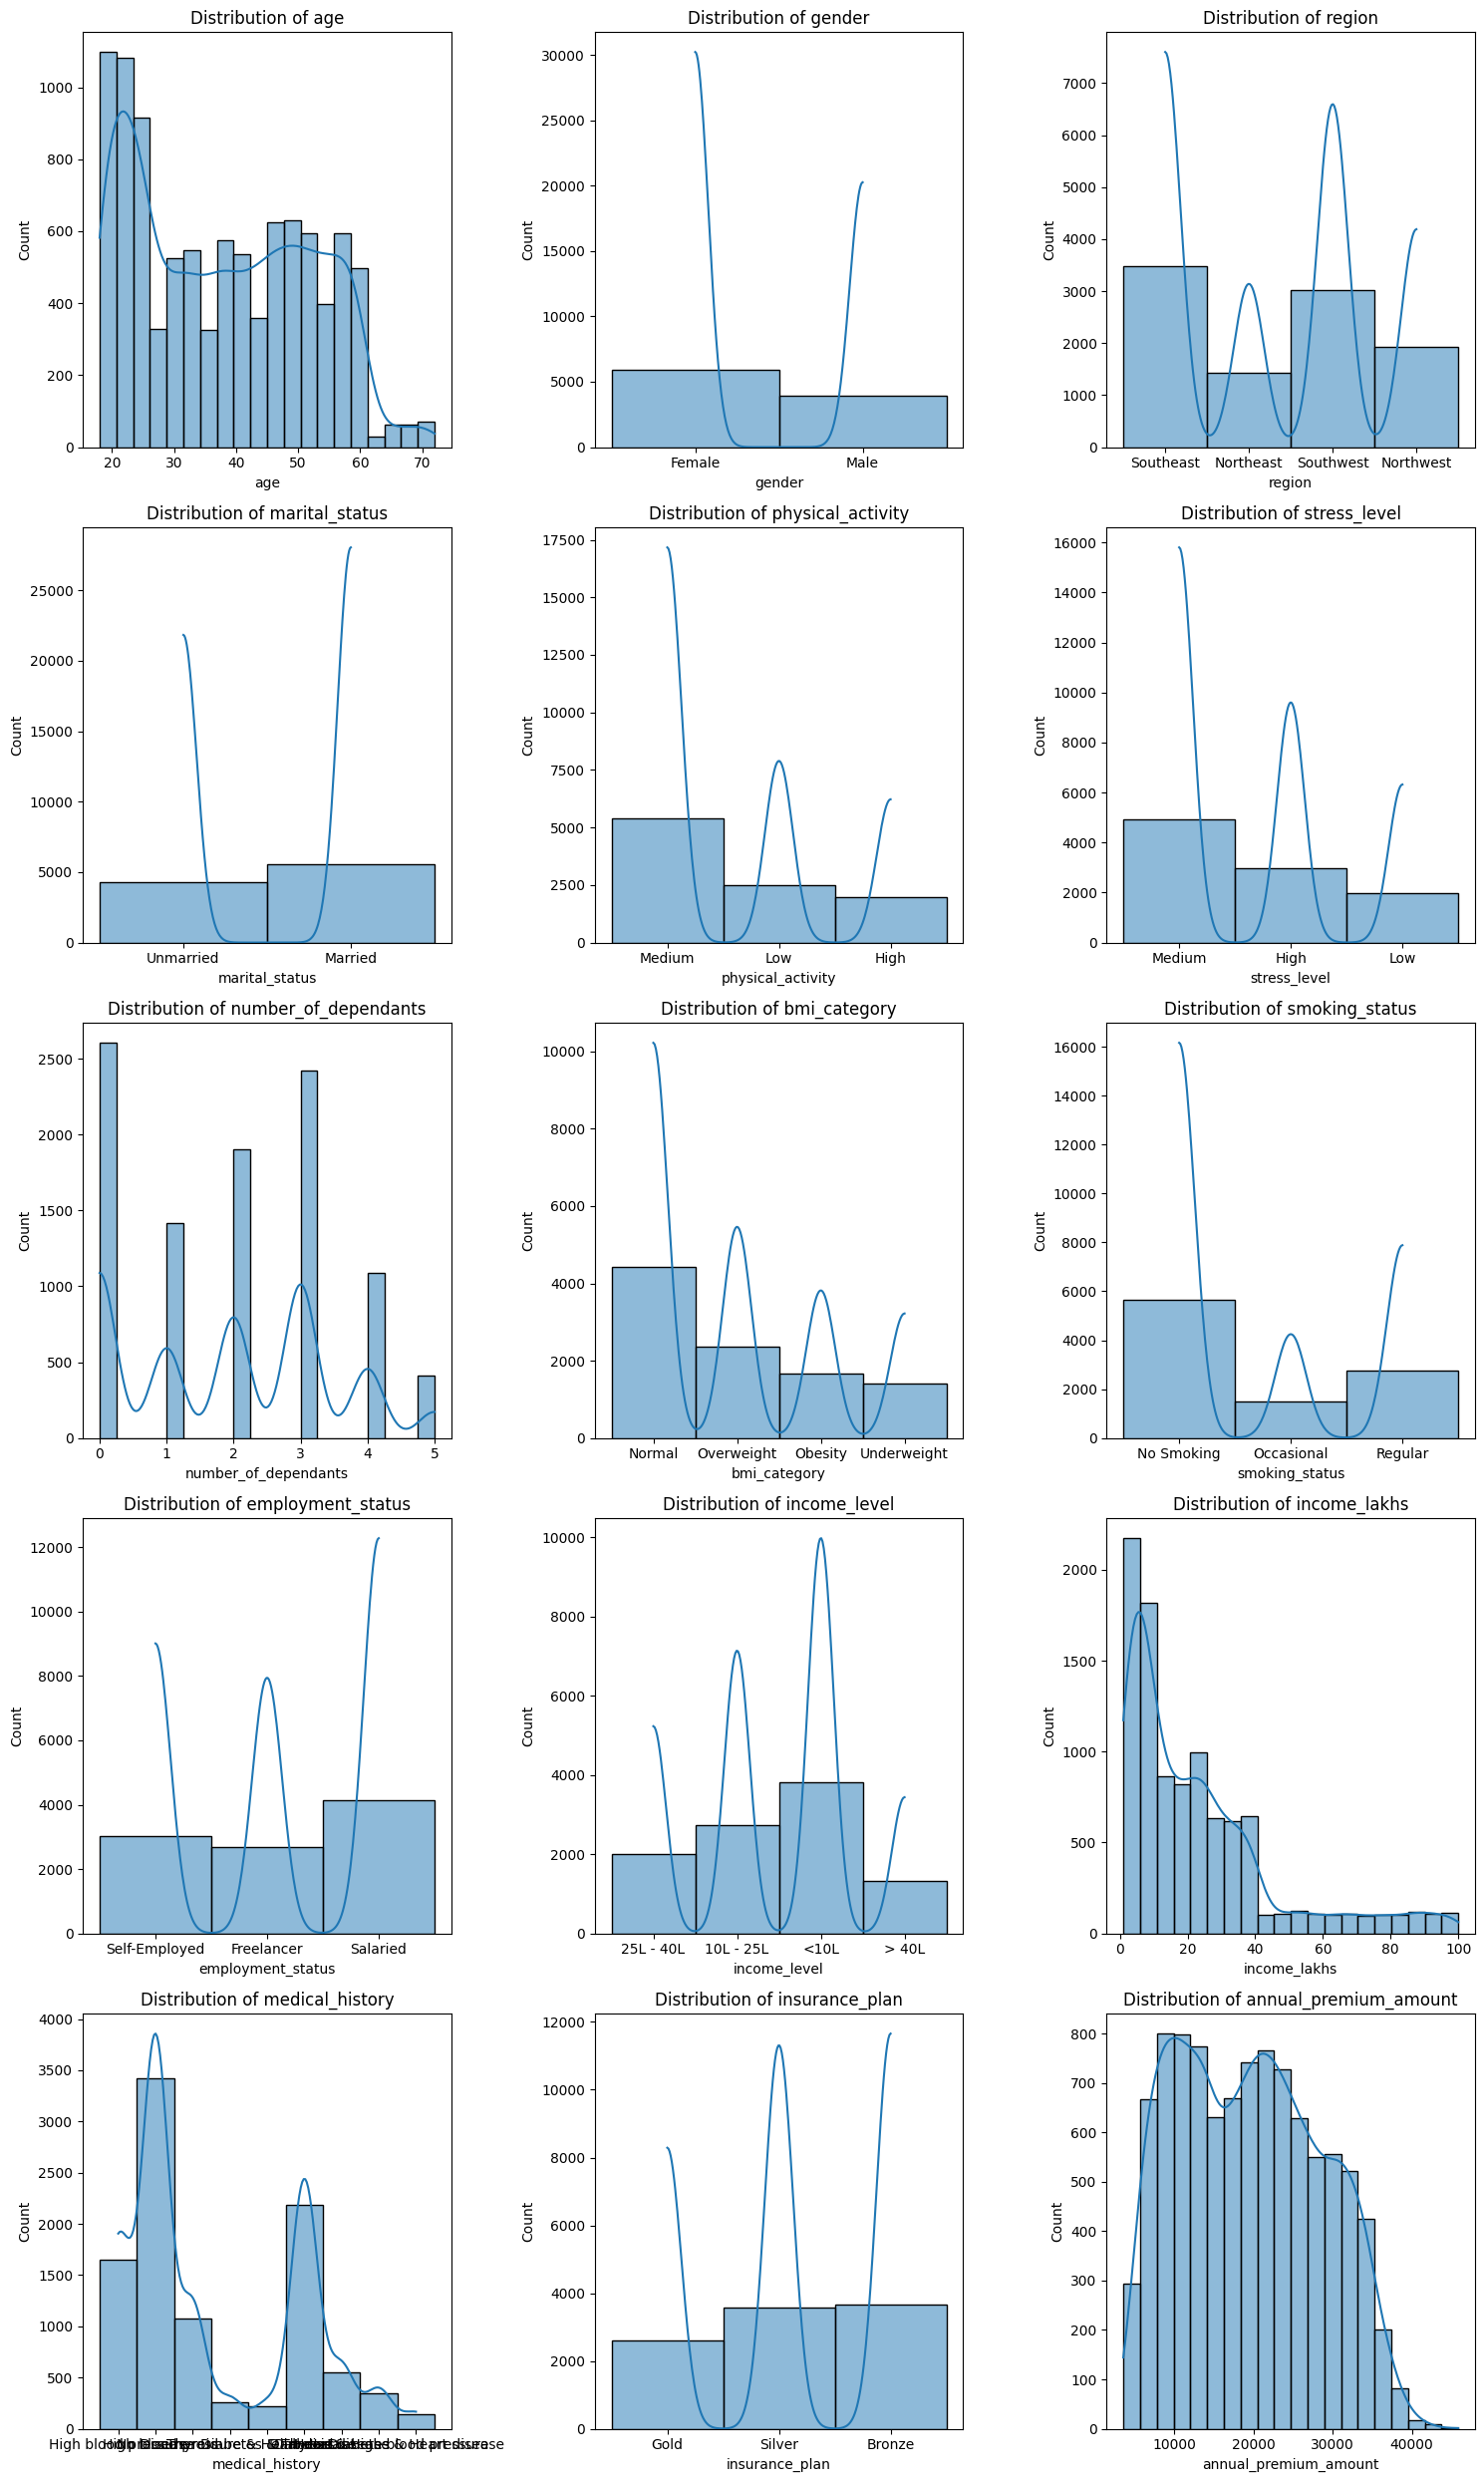

In [591]:
# List of columns to plot
cols = ['age', 'gender', 'region', 'marital_status', 'physical_activity',
       'stress_level', 'number_of_dependants', 'bmi_category',
       'smoking_status', 'employment_status', 'income_level', 'income_lakhs',
       'medical_history', 'insurance_plan', 'annual_premium_amount']

# Number of columns in the plot grid
num_cols = 3
num_rows = math.ceil(len(cols) / num_cols)  # Calculate required rows

# Set figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(cols):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Variability with annual_premium_amount

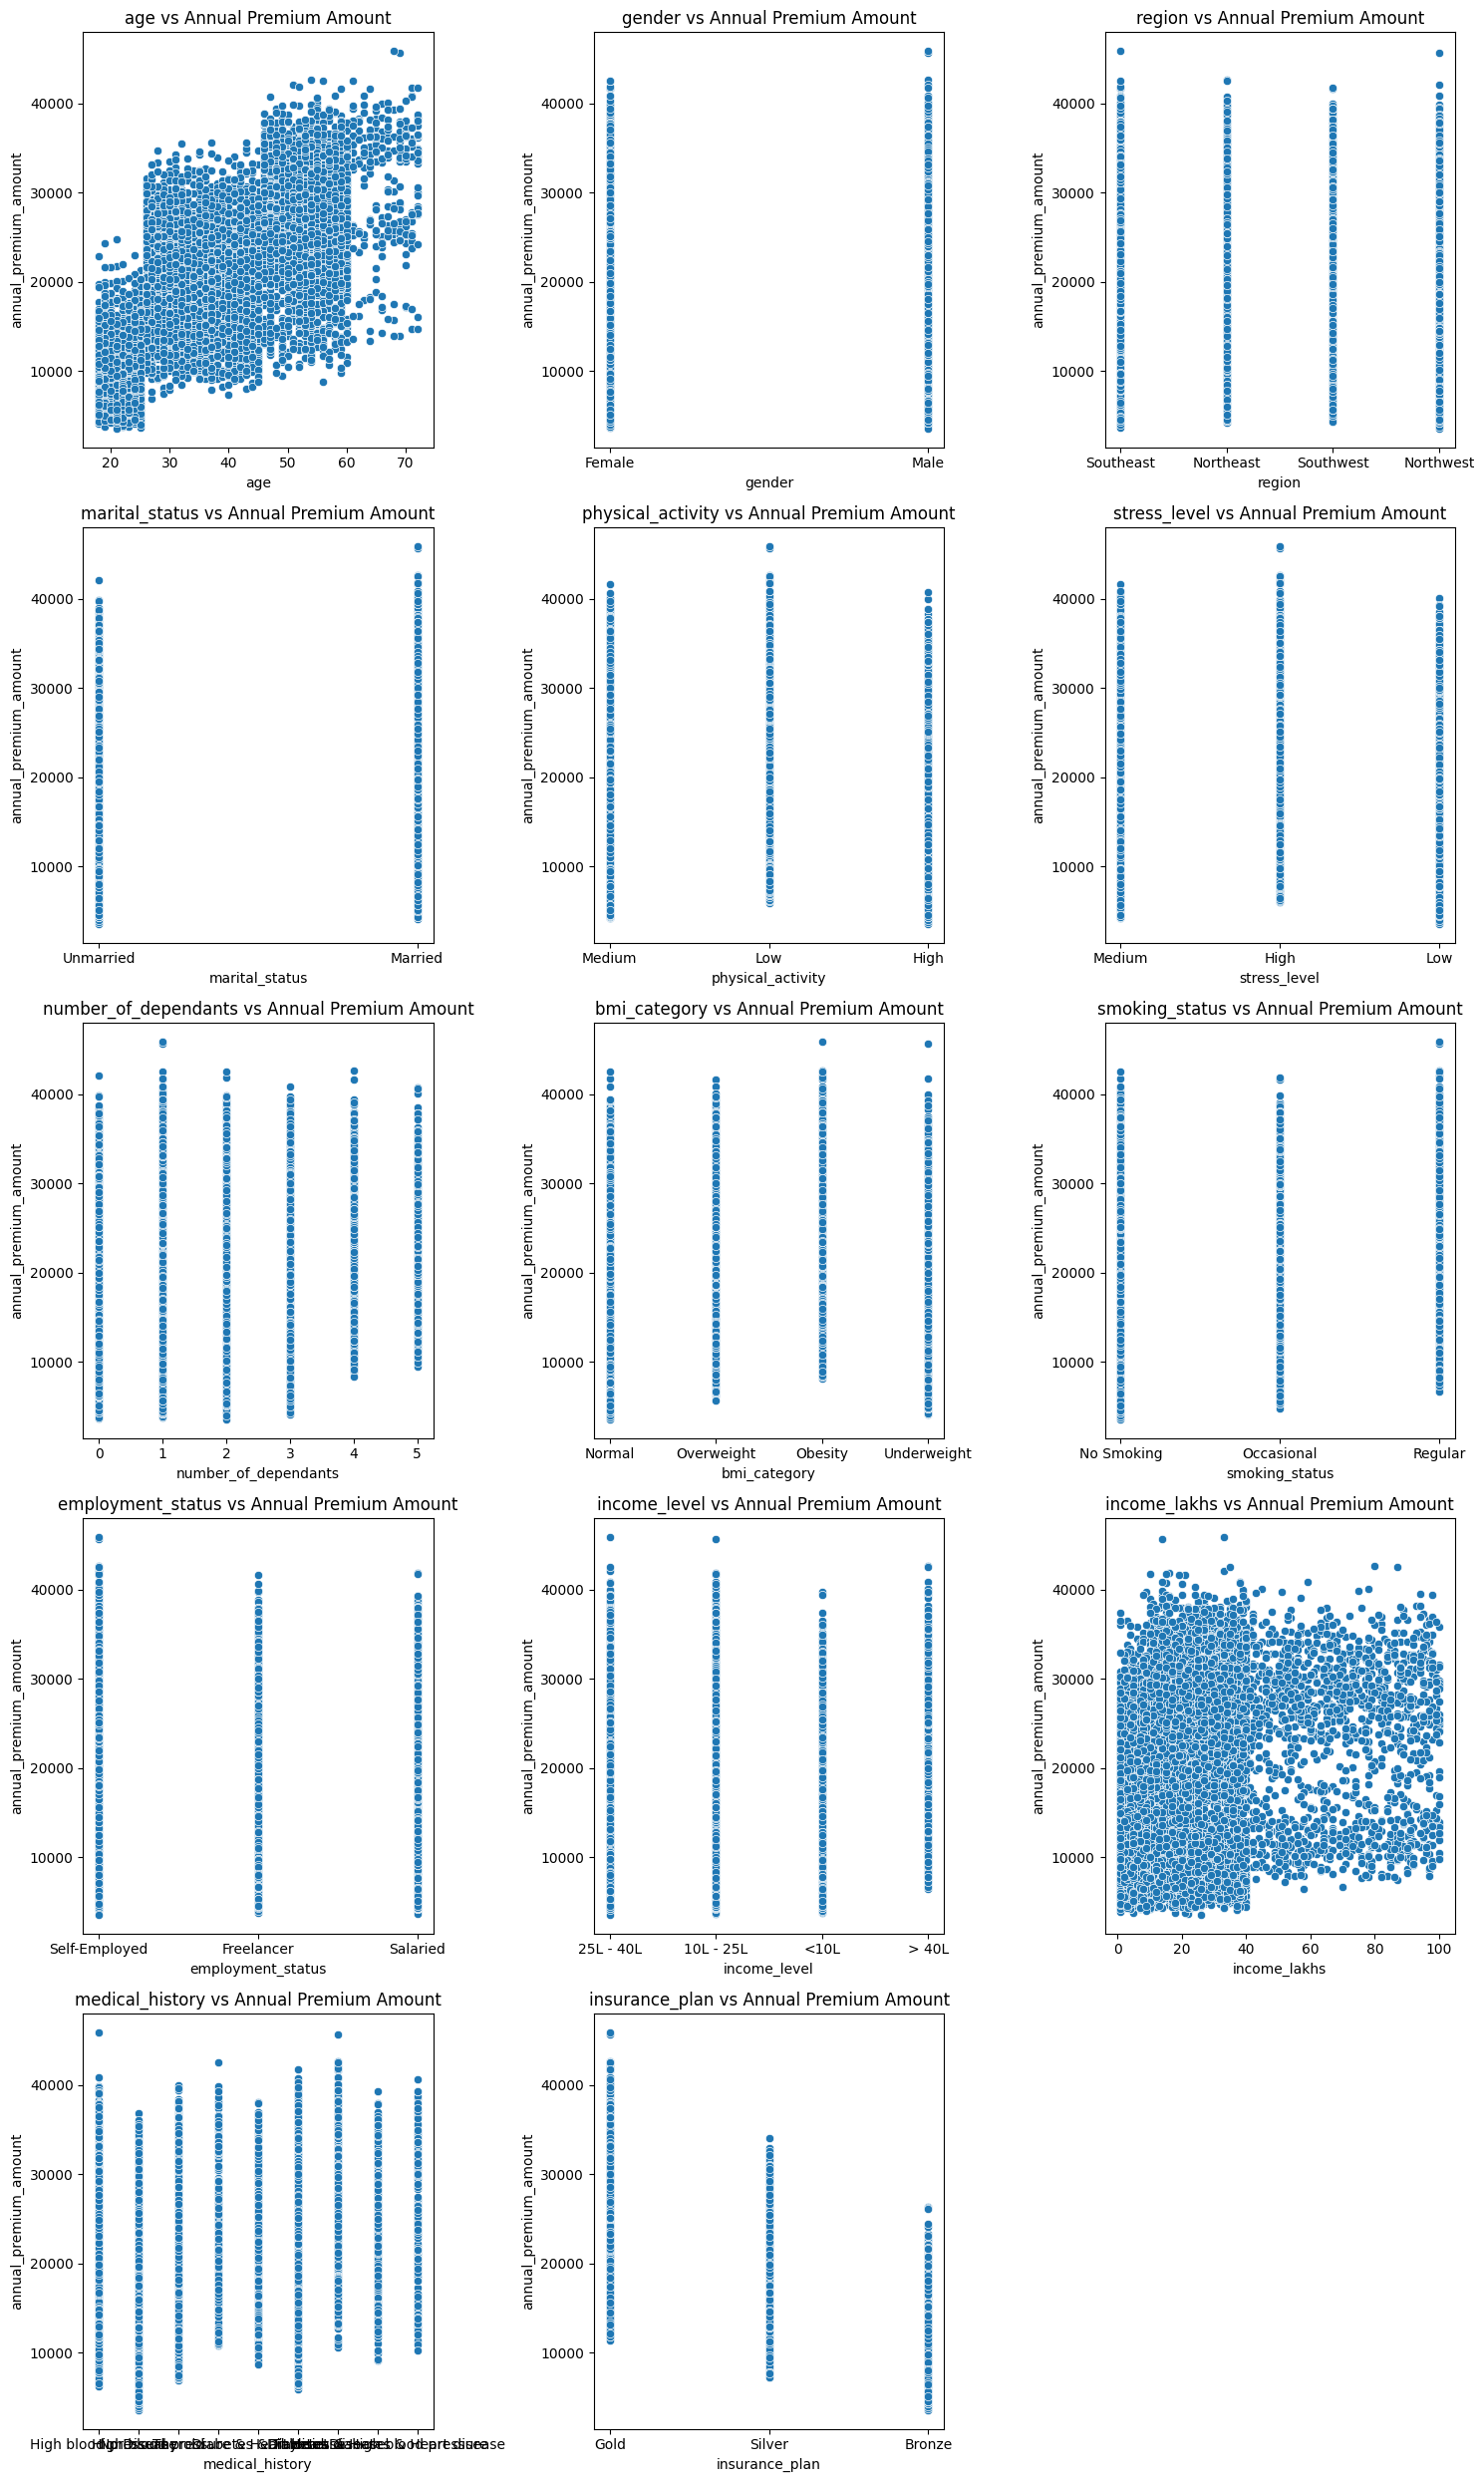

In [592]:
# List of columns for y-axis
cols = [
    "age","gender", "region", "marital_status", "physical_activity", "stress_level", 
    "number_of_dependants", "bmi_category", "smoking_status", "employment_status", 
    "income_level", "income_lakhs", "medical_history", "insurance_plan"
]

# Number of columns in the plot grid
num_cols = 3
num_rows = math.ceil(len(cols) / num_cols)  # Calculate required rows

# Set figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot scatter plots
for i, col in enumerate(cols):
    sns.scatterplot(data=df, x=col, y="annual_premium_amount", ax=axes[i])
    axes[i].set_title(f"{col} vs Annual Premium Amount")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Feature Engineering
##### Encode the Categorical Columns and Scale the Numeric columns

In [593]:
numeric_cols

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

In [594]:
categorical_cols

Index(['gender', 'region', 'marital_status', 'physical_activity',
       'stress_level', 'bmi_category', 'smoking_status', 'employment_status',
       'income_level', 'medical_history', 'insurance_plan'],
      dtype='object')

#### Encode

In [595]:
for col in categorical_cols:
    print(col,': ',df[col].unique())

gender :  ['Female' 'Male']
region :  ['Southeast' 'Northeast' 'Southwest' 'Northwest']
marital_status :  ['Unmarried' 'Married']
physical_activity :  ['Medium' 'Low' 'High']
stress_level :  ['Medium' 'High' 'Low']
bmi_category :  ['Normal' 'Overweight' 'Obesity' 'Underweight']
smoking_status :  ['No Smoking' 'Occasional' 'Regular']
employment_status :  ['Self-Employed' 'Freelancer' 'Salaried']
income_level :  ['25L - 40L' '10L - 25L' '<10L' '> 40L']
medical_history :  ['High blood pressure' 'No Disease' 'Thyroid'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid' 'Diabetes'
 'Heart disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease']
insurance_plan :  ['Gold' 'Silver' 'Bronze']


##### For physical_activity/stress_level values we consider the following:
##### Physical_Activity: High = 0, Medium = 1, Low = 4
##### Stress_Level: High = 4, Medium = 1, Low = 0

In [596]:
df['physical_activity'] = df['physical_activity'].map({'Low':4, 'Medium':1, 'High':0})
df.head(2)

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,56,Female,Southeast,Unmarried,1,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944
1,38,Female,Northeast,Married,4,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108


In [597]:
df['stress_level'] = df['stress_level'].map({'Low':0, 'Medium':1, 'High':4})
df.head(2)

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,56,Female,Southeast,Unmarried,1,1,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944
1,38,Female,Northeast,Married,4,4,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108


In [598]:
df['income_level'] = df['income_level'].map({'<10L':0, '10L - 25L':1, '25L - 40L':2, '> 40L':3})
df.head(2)

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,56,Female,Southeast,Unmarried,1,1,2,Normal,No Smoking,Self-Employed,2,37,High blood pressure,Gold,27944
1,38,Female,Northeast,Married,4,4,5,Overweight,Occasional,Freelancer,1,10,No Disease,Silver,21108


In [599]:
df['insurance_plan'] = df['insurance_plan'].map({'Bronze':0, 'Silver':1, 'Gold':2})
df.head(2)

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,56,Female,Southeast,Unmarried,1,1,2,Normal,No Smoking,Self-Employed,2,37,High blood pressure,2,27944
1,38,Female,Northeast,Married,4,4,5,Overweight,Occasional,Freelancer,1,10,No Disease,1,21108


In [600]:
df_encoded = pd.get_dummies(df,columns = ['gender','region','marital_status','bmi_category','smoking_status',
                             'employment_status'],dtype=int,drop_first=True)
df_encoded.head()

,age,physical_activity,stress_level,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,gender_Male,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,56,1,1,2,2,37,High blood pressure,2,27944,0,...,1,0,1,0,0,0,0,0,0,1
1,38,4,4,5,1,10,No Disease,1,21108,0,...,0,0,0,0,1,0,1,0,0,0
2,18,1,4,0,0,9,No Disease,0,8459,0,...,0,1,1,0,0,0,0,0,0,0
3,55,0,1,3,0,9,Thyroid,1,21685,1,...,0,0,0,0,1,0,1,0,1,0
4,22,1,4,2,1,13,High blood pressure & Heart disease,0,15984,1,...,1,0,1,0,0,0,0,1,0,1


### Generate a risk score based on medical_history

In [601]:
df_encoded['medical_history'].value_counts()

medical_history
No Disease                             3424
Diabetes                               2186
High blood pressure                    1647
Thyroid                                1078
Heart disease                           547
Diabetes & High blood pressure          348
High blood pressure & Heart disease     263
Diabetes & Thyroid                      222
Diabetes & Heart disease                143
Name: count, dtype: int64

In [602]:
df_encoded[['d1','d2']] = df_encoded['medical_history'].str.lower().str.split(' & ',expand=True)

In [603]:
df_encoded.sample(3)

,age,physical_activity,stress_level,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,gender_Male,...,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed,d1,d2
6294,39,1,4,0,1,12,Diabetes,0,18135,0,...,1,0,1,0,0,1,0,0,diabetes,None
712,50,1,0,0,1,24,High blood pressure,2,27851,0,...,1,0,0,0,0,0,0,1,high blood pressure,None
4412,26,1,4,2,1,18,Diabetes,1,19870,0,...,0,0,0,0,0,0,0,0,diabetes,None


In [604]:
df_encoded['d1'].unique()

array(['high blood pressure', 'no disease', 'thyroid', 'diabetes',
       'heart disease'], dtype=object)

In [605]:
risk_score = {
    'diabetes':6,
    'heart disease':8,
    'high blood pressure':6,
    'thyroid':5,
    'no disease':0,
    'none':0
}

In [606]:
df_encoded['d1'].fillna('none',inplace=True)
df_encoded['d2'].fillna('none',inplace=True)
df_encoded['med_risk_score'] = 0

C:\Users\shravan pattan\AppData\Local\Temp\ipykernel_1772\1257962374.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded['d1'].fillna('none',inplace=True)
C:\Users\shravan pattan\AppData\Local\Temp\ipykernel_1772\1257962374.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [607]:
for d in ['d1','d2']:
    df_encoded['med_risk_score'] += df_encoded[d].map(risk_score) 

In [608]:
df_encoded.head(2)

,age,physical_activity,stress_level,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,gender_Male,...,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed,d1,d2,med_risk_score
0,56,1,1,2,2,37,High blood pressure,2,27944,0,...,0,0,0,0,0,0,1,high blood pressure,none,6
1,38,4,4,5,1,10,No Disease,1,21108,0,...,0,1,0,1,0,0,0,no disease,none,0


##### since we got the total_risk_score, we can drop medical_history,d1 and d2

In [609]:
df_encoded = df_encoded.drop(columns = ['d1','d2','medical_history'])

In [610]:
df_encoded.head(2)

,age,physical_activity,stress_level,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,gender_Male,region_Northwest,...,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed,med_risk_score
0,56,1,1,2,2,37,2,27944,0,0,...,0,1,0,0,0,0,0,0,1,6
1,38,4,4,5,1,10,1,21108,0,0,...,0,0,0,1,0,1,0,0,0,0


In [611]:
df_encoded['lifestyle_risk_score'] = df_encoded['physical_activity'] + df_encoded['stress_level']
df_encoded.head(2)

,age,physical_activity,stress_level,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,gender_Male,region_Northwest,...,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed,med_risk_score,lifestyle_risk_score
0,56,1,1,2,2,37,2,27944,0,0,...,1,0,0,0,0,0,0,1,6,2
1,38,4,4,5,1,10,1,21108,0,0,...,0,0,1,0,1,0,0,0,0,8


In [612]:
df_encoded = df_encoded.drop(columns=['physical_activity','stress_level'],axis=1)
df_encoded.head(1)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed,med_risk_score,lifestyle_risk_score
0,56,2,2,37,2,27944,0,0,1,0,1,0,0,0,0,0,0,1,6,2


### Scale numerical columns 

In [613]:
df_encoded.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'gender_Male',
       'region_Northwest', 'region_Southeast', 'region_Southwest',
       'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed',
       'med_risk_score', 'lifestyle_risk_score'],
      dtype='object')

In [614]:
cols_to_scale = ['age','lifestyle_risk_score', 'number_of_dependants',
       'income_level', 'income_lakhs', 'insurance_plan','med_risk_score']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])
df_encoded.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed,med_risk_score,lifestyle_risk_score
0,0.703704,0.4,0.666667,0.363636,1.0,27944,0,0,1,0,1,0,0,0,0,0,0,1,0.428571,0.250
1,0.370370,1.0,0.333333,0.090909,0.5,21108,0,0,0,0,0,0,1,0,1,0,0,0,0.000000,1.000
2,0.000000,0.0,0.000000,0.080808,0.0,8459,0,0,0,1,1,0,0,0,0,0,0,0,0.000000,0.625
3,0.685185,0.6,0.000000,0.080808,0.5,21685,1,0,0,0,0,0,1,0,1,0,1,0,0.357143,0.125
4,0.074074,0.4,0.333333,0.121212,0.0,15984,1,0,1,0,1,0,0,0,0,1,0,1,1.000000,0.625


In [615]:
df_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
age,9858.0,0.366014,0.258820,0.0,0.111111,0.351852,0.592593,1.0
number_of_dependants,9858.0,0.383993,0.300605,0.0,0.000000,0.400000,0.600000,1.0
income_level,9858.0,0.360756,0.352198,0.0,0.000000,0.333333,0.666667,1.0
income_lakhs,9858.0,0.219027,0.226801,0.0,0.050505,0.151515,0.303030,1.0
insurance_plan,9858.0,0.446135,0.395765,0.0,0.000000,0.500000,1.000000,1.0
annual_premium_amount,9858.0,19513.853419,8900.593367,3582.0,11777.000000,19331.500000,26505.750000,45854.0
gender_Male,9858.0,0.401298,0.490186,0.0,0.000000,0.000000,1.000000,1.0
region_Northwest,9858.0,0.194664,0.395962,0.0,0.000000,0.000000,0.000000,1.0
region_Southeast,9858.0,0.353013,0.477931,0.0,0.000000,0.000000,1.000000,1.0
region_Southwest,9858.0,0.306452,0.461043,0.0,0.000000,0.000000,1.000000,1.0


### Check for correlation

In [616]:
X = df_encoded.drop('annual_premium_amount',axis=1)
y = df_encoded['annual_premium_amount']
X.shape,df_encoded.shape

((9858, 19), (9858, 20))

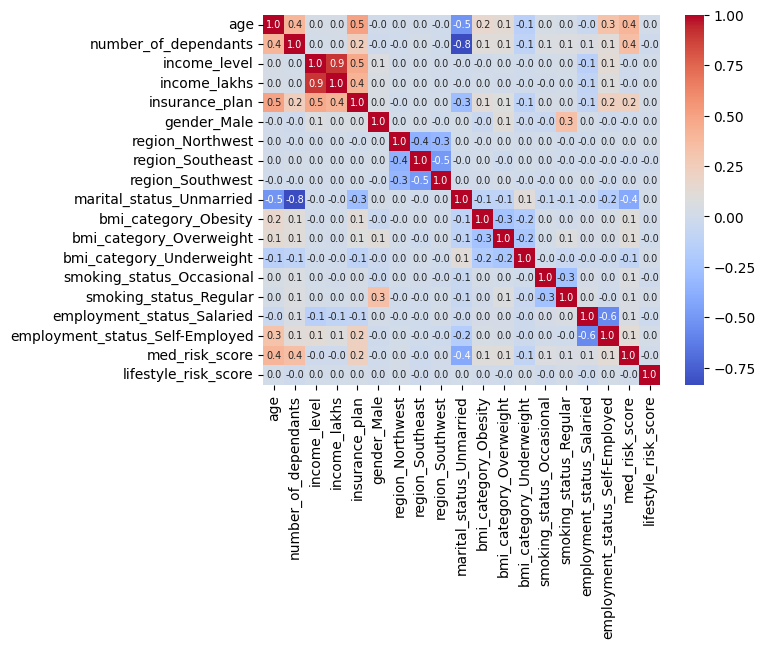

In [617]:
cm = X.corr()
sns.heatmap(cm, annot=True, fmt=".1f", cmap="coolwarm", annot_kws={"size": 7})  
plt.show()

##### we observe there are some strong correlations

#### Variance Inflation Factor

In [618]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [619]:
df_encoded.values

array([[0.7037037 , 0.4       , 0.66666667, ..., 1.        , 0.42857143,
        0.25      ],
       [0.37037037, 1.        , 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.625     ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.625     ],
       [0.18518519, 0.        , 0.66666667, ..., 1.        , 0.42857143,
        0.        ],
       [0.27777778, 0.6       , 0.        , ..., 1.        , 0.35714286,
        0.5       ]], shape=(9858, 20))

In [620]:
def calculate_vif(data):
    vif = pd.DataFrame()
    vif['Column'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif

In [621]:
calculate_vif(X)

,Column,VIF
0,age,5.541063
1,number_of_dependants,5.320401
2,income_level,12.548788
3,income_lakhs,10.947288
4,insurance_plan,4.147071
5,gender_Male,1.910118
6,region_Northwest,2.082989
7,region_Southeast,2.952809
8,region_Southwest,2.679323
9,marital_status_Unmarried,3.247214


In [622]:
calculate_vif(X.drop('income_level',axis=1))

,Column,VIF
0,age,5.488217
1,number_of_dependants,5.306542
2,income_lakhs,2.450579
3,insurance_plan,3.875312
4,gender_Male,1.901611
5,region_Northwest,2.082813
6,region_Southeast,2.951877
7,region_Southwest,2.678296
8,marital_status_Unmarried,3.226402
9,bmi_category_Obesity,1.419612


##### All vif values < 10, so we proceed with dropping income_level alone

In [623]:
X_reduced = X.drop('income_level', axis="columns")
X_reduced.head(1)

,age,number_of_dependants,income_lakhs,insurance_plan,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed,med_risk_score,lifestyle_risk_score
0,0.703704,0.4,0.363636,1.0,0,0,1,0,1,0,0,0,0,0,0,1,0.428571,0.25


### Model Training

In [624]:
X_reduced.shape,y.shape

((9858, 18), (9858,))

In [625]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_reduced,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape

((6900, 18), (2958, 18))

In [626]:
from sklearn.linear_model import LinearRegression

model_lr=LinearRegression()
model_lr.fit(X_train,y_train)
test_score = model_lr.score(X_test,y_test)
train_score = model_lr.score(X_train,y_train)
test_score,train_score

(0.9578771631160459, 0.9583441168970603)

In [627]:
from sklearn.linear_model import Lasso,Ridge

model_l=Lasso()
model_l.fit(X_train,y_train)
test_score_l = model_l.score(X_test,y_test)
train_score_l = model_l.score(X_train,y_train)

model_r=Ridge()
model_r.fit(X_train,y_train)
test_score_r = model_r.score(X_test,y_test)
train_score_r = model_r.score(X_train,y_train)

print(f'test_score_lasso: {test_score_l}')
print(f'train_score_lasso: {train_score_l}')
print(f'test_score_ridge: {test_score_r}')
print(f'train_score_ridge: {train_score_r}')

test_score_lasso: 0.9578790906311896
train_score_lasso: 0.9583412636331163
test_score_ridge: 0.957883398682094
train_score_ridge: 0.9583432034196149


In [628]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor()
model_dt.fit(X_train,y_train)
test_score_dt = model_dt.score(X_test,y_test)
train_score_dt = model_dt.score(X_train,y_train)
test_score_dt,train_score_dt

(0.9834934975618, 0.99999566566595)

In [629]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train,y_train)
test_score_rf = model_rf.score(X_test,y_test)
train_score_rf = model_rf.score(X_train,y_train)
test_score_rf,train_score_rf

(0.990413665050551, 0.9986812676580091)

In [630]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor()
model_gb.fit(X_train,y_train)
test_score_gb = model_gb.score(X_test,y_test)
train_score_gb = model_gb.score(X_train,y_train)
test_score_gb,train_score_gb

(0.9937995707052305, 0.9941813057583663)

In [631]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(n_estimators= 250, max_depth=4, learning_rate = 0.2)
model_xgb.fit(X_train,y_train)
test_score_xgb = model_xgb.score(X_test,y_test)
train_score_xgb = model_xgb.score(X_train,y_train)
test_score_xgb,train_score_xgb

(0.9946016073226929, 0.9966853260993958)

#### so with a test_score of 0.99 we take XGBRegressor as out best model

### Lets see the feature importance

In [632]:
model_lr.coef_

array([ 1.08169785e+04, -6.36570995e+02, -7.66012668e+02,  1.32597271e+04,
        8.47872500e+01,  7.65164510e+01,  1.13662324e+02,  6.25549341e-01,
       -7.69221070e+02,  4.12187137e+03,  2.06855220e+03,  3.64012454e+02,
        1.19063254e+03,  3.08760054e+03,  4.48698597e+01,  3.64430996e+02,
        6.48723625e+03,  4.72285427e+03])

In [633]:
X_reduced.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'gender_Male', 'region_Northwest', 'region_Southeast',
       'region_Southwest', 'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed',
       'med_risk_score', 'lifestyle_risk_score'],
      dtype='object')

In [634]:
feature_importance = pd.DataFrame(data = model_lr.coef_, index=X_reduced.columns, columns=['Coefficients'])
feature_importance

,Coefficients
age,10816.978546
number_of_dependants,-636.570995
income_lakhs,-766.012668
insurance_plan,13259.727101
gender_Male,84.787250
region_Northwest,76.516451
region_Southeast,113.662324
region_Southwest,0.625549
marital_status_Unmarried,-769.221070
bmi_category_Obesity,4121.871374


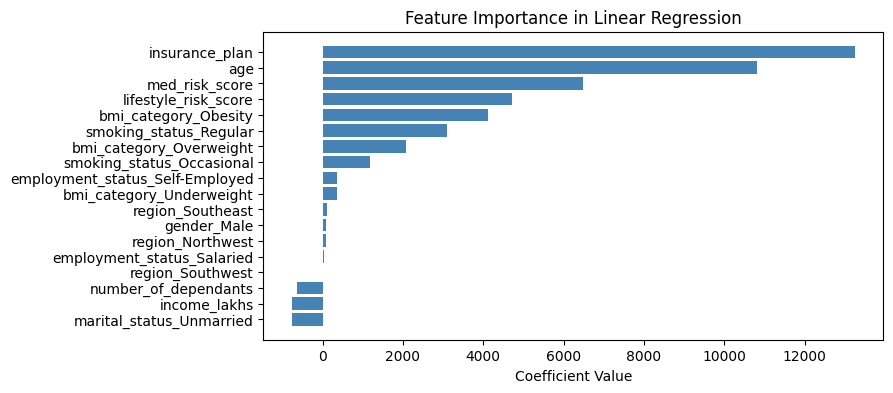

In [635]:
feature_importance = feature_importance.sort_values(by='Coefficients', ascending=True)

plt.figure(figsize=(8, 4))
plt.barh(feature_importance.index, feature_importance['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

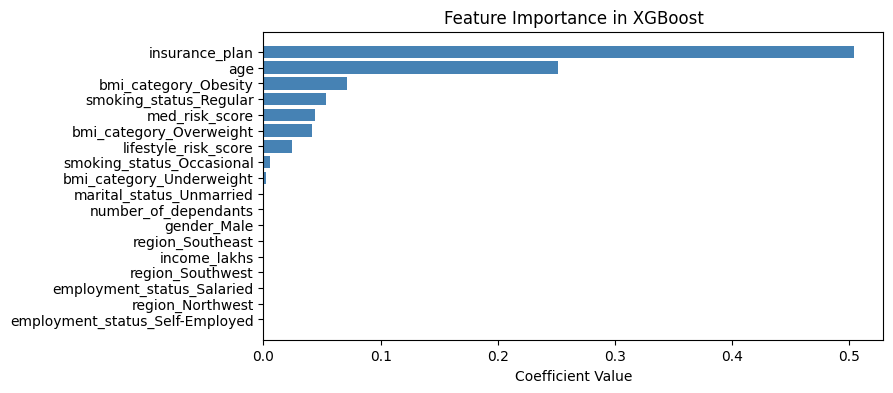

In [636]:
feature_importance = model_xgb.feature_importances_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost')
plt.show()

### Error Analysis

In [637]:
y_pred = model_xgb.predict(X_test)

In [638]:
dif = y_pred-y_test
dif[:5]

8496    -23.033203
507    -396.273438
5147    723.955078
887     739.892578
8848    650.476562
Name: annual_premium_amount, dtype: float64

In [639]:
dif_percent = (dif/y_test)*100
dif_percent[:5]

8496    -0.074946
507     -1.200938
5147     4.746935
887     10.667425
8848     5.962752
Name: annual_premium_amount, dtype: float64

<Axes: xlabel='annual_premium_amount', ylabel='Count'>

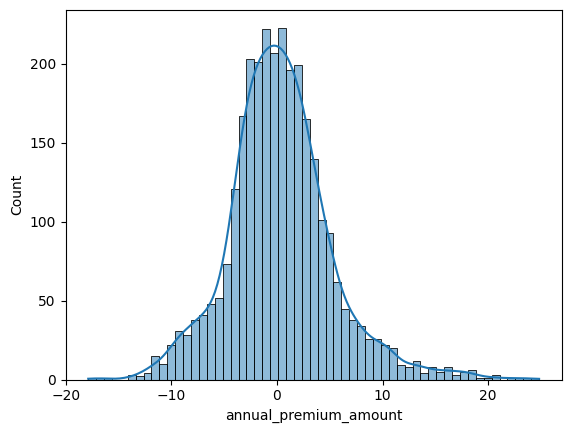

In [640]:
sns.histplot(dif_percent,kde=True)

#### we observe there is no extreme deviation of the predicted values from true values

In [641]:
import numpy as np
dif_results = pd.DataFrame({
    'y_test':y_test,
    'y_pred':y_pred,
    'difference':dif,
    'dif_percent':dif_percent,
    'abs(dif_pct)':np.abs(dif_percent)
})

dif_results.head()

,y_test,y_pred,difference,dif_percent,abs(dif_pct)
8496,30733,30709.966797,-23.033203,-0.074946,0.074946
507,32997,32600.726562,-396.273438,-1.200938,1.200938
5147,15251,15974.955078,723.955078,4.746935,4.746935
887,6936,7675.892578,739.892578,10.667425,10.667425
8848,10909,11559.476562,650.476562,5.962752,5.962752


In [642]:
dif_results.sort_values(by='abs(dif_pct)',ascending=False)

,y_test,y_pred,difference,dif_percent,abs(dif_pct)
1518,4332,5407.387207,1075.387207,24.824266,24.824266
5649,4736,5851.272949,1115.272949,23.548838,23.548838
1170,4777,5856.102051,1079.102051,22.589534,22.589534
9048,4729,5789.139648,1060.139648,22.417840,22.417840
596,4803,5798.340820,995.340820,20.723315,20.723315
...,...,...,...,...,...
5321,15616,15613.526367,-2.473633,-0.015840,0.015840
3330,30040,30043.923828,3.923828,0.013062,0.013062
2198,34386,34382.878906,-3.121094,-0.009077,0.009077
456,11798,11799.015625,1.015625,0.008608,0.008608


In [643]:
dif_results.shape

(2958, 5)

In [644]:
ext_error_threshold = 10
extreme_res = dif_results[abs(dif_results['dif_percent'])>ext_error_threshold]
extreme_res.shape

(163, 5)

In [645]:
extreme_res.shape[0]/dif_results.shape[0]

0.05510480054090602

#### Only 5.5% predicted values have high difference with true values
### Hence our model is ready for deployment

In [646]:
cols_to_scale

['age',
 'lifestyle_risk_score',
 'number_of_dependants',
 'income_level',
 'income_lakhs',
 'insurance_plan',
 'med_risk_score']

In [648]:
from joblib import dump

dump(model_xgb, "artifacts/model.joblib")
scaler_with_cols_and_maps = {
    'scaler': scaler,
    'cols_to_scale': cols_to_scale,
    'mapping_physical_activity': {'Low': 4, 'Medium': 1, 'High': 0},
    'mapping_stress_level': {'Low': 0, 'Medium': 1, 'High': 4},
    'mapping_income_level': {'<10L': 0, '10L - 25L': 1, '25L - 40L': 2, '> 40L': 3},
    'mapping_insurance_plan': {'Bronze': 0, 'Silver': 1, 'Gold': 2},
    'mapping_risk_score': {
        'diabetes': 6,
        'heart disease': 8,
        'high blood pressure': 6,
        'thyroid': 5,
        'no disease': 0,
        'none': 0
    }
}

from joblib import dump
dump(scaler_with_cols_and_maps, "artifacts/scaler_with_cols_and_maps.joblib")

['artifacts/scaler_with_cols_and_maps.joblib']

### If our model had high errors we would proceed with the following feature analysis

In [649]:
extreme_errors_df = X_test.loc[extreme_res.index]
extreme_errors_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed,med_risk_score,lifestyle_risk_score
887,0.111111,0.0,0.161616,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0.0,0.625
6110,0.055556,0.6,0.303030,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.250
1918,0.129630,0.0,0.323232,0.5,0,0,0,1,1,0,0,0,0,0,1,0,0.0,0.000
8013,0.129630,0.0,0.131313,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0.0,0.250
6559,0.037037,0.4,0.242424,0.0,0,0,1,0,1,0,0,1,0,0,0,0,0.0,0.500


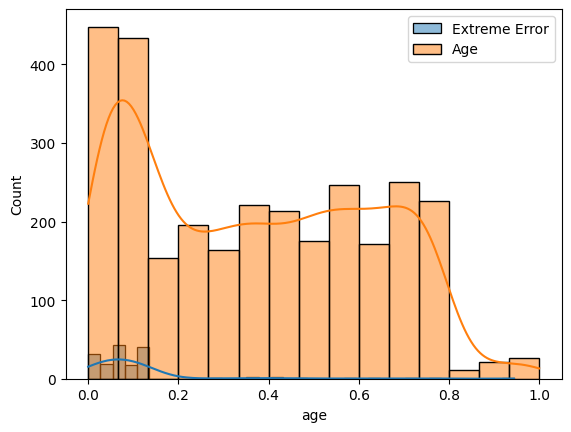

In [650]:
sns.histplot(extreme_errors_df.age	,kde=True,label = "Extreme Error")
sns.histplot(X_test['age'],kde=True,label = "Age")
plt.legend()
plt.show()

In [651]:
X_test.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'gender_Male', 'region_Northwest', 'region_Southeast',
       'region_Southwest', 'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed',
       'med_risk_score', 'lifestyle_risk_score'],
      dtype='object')

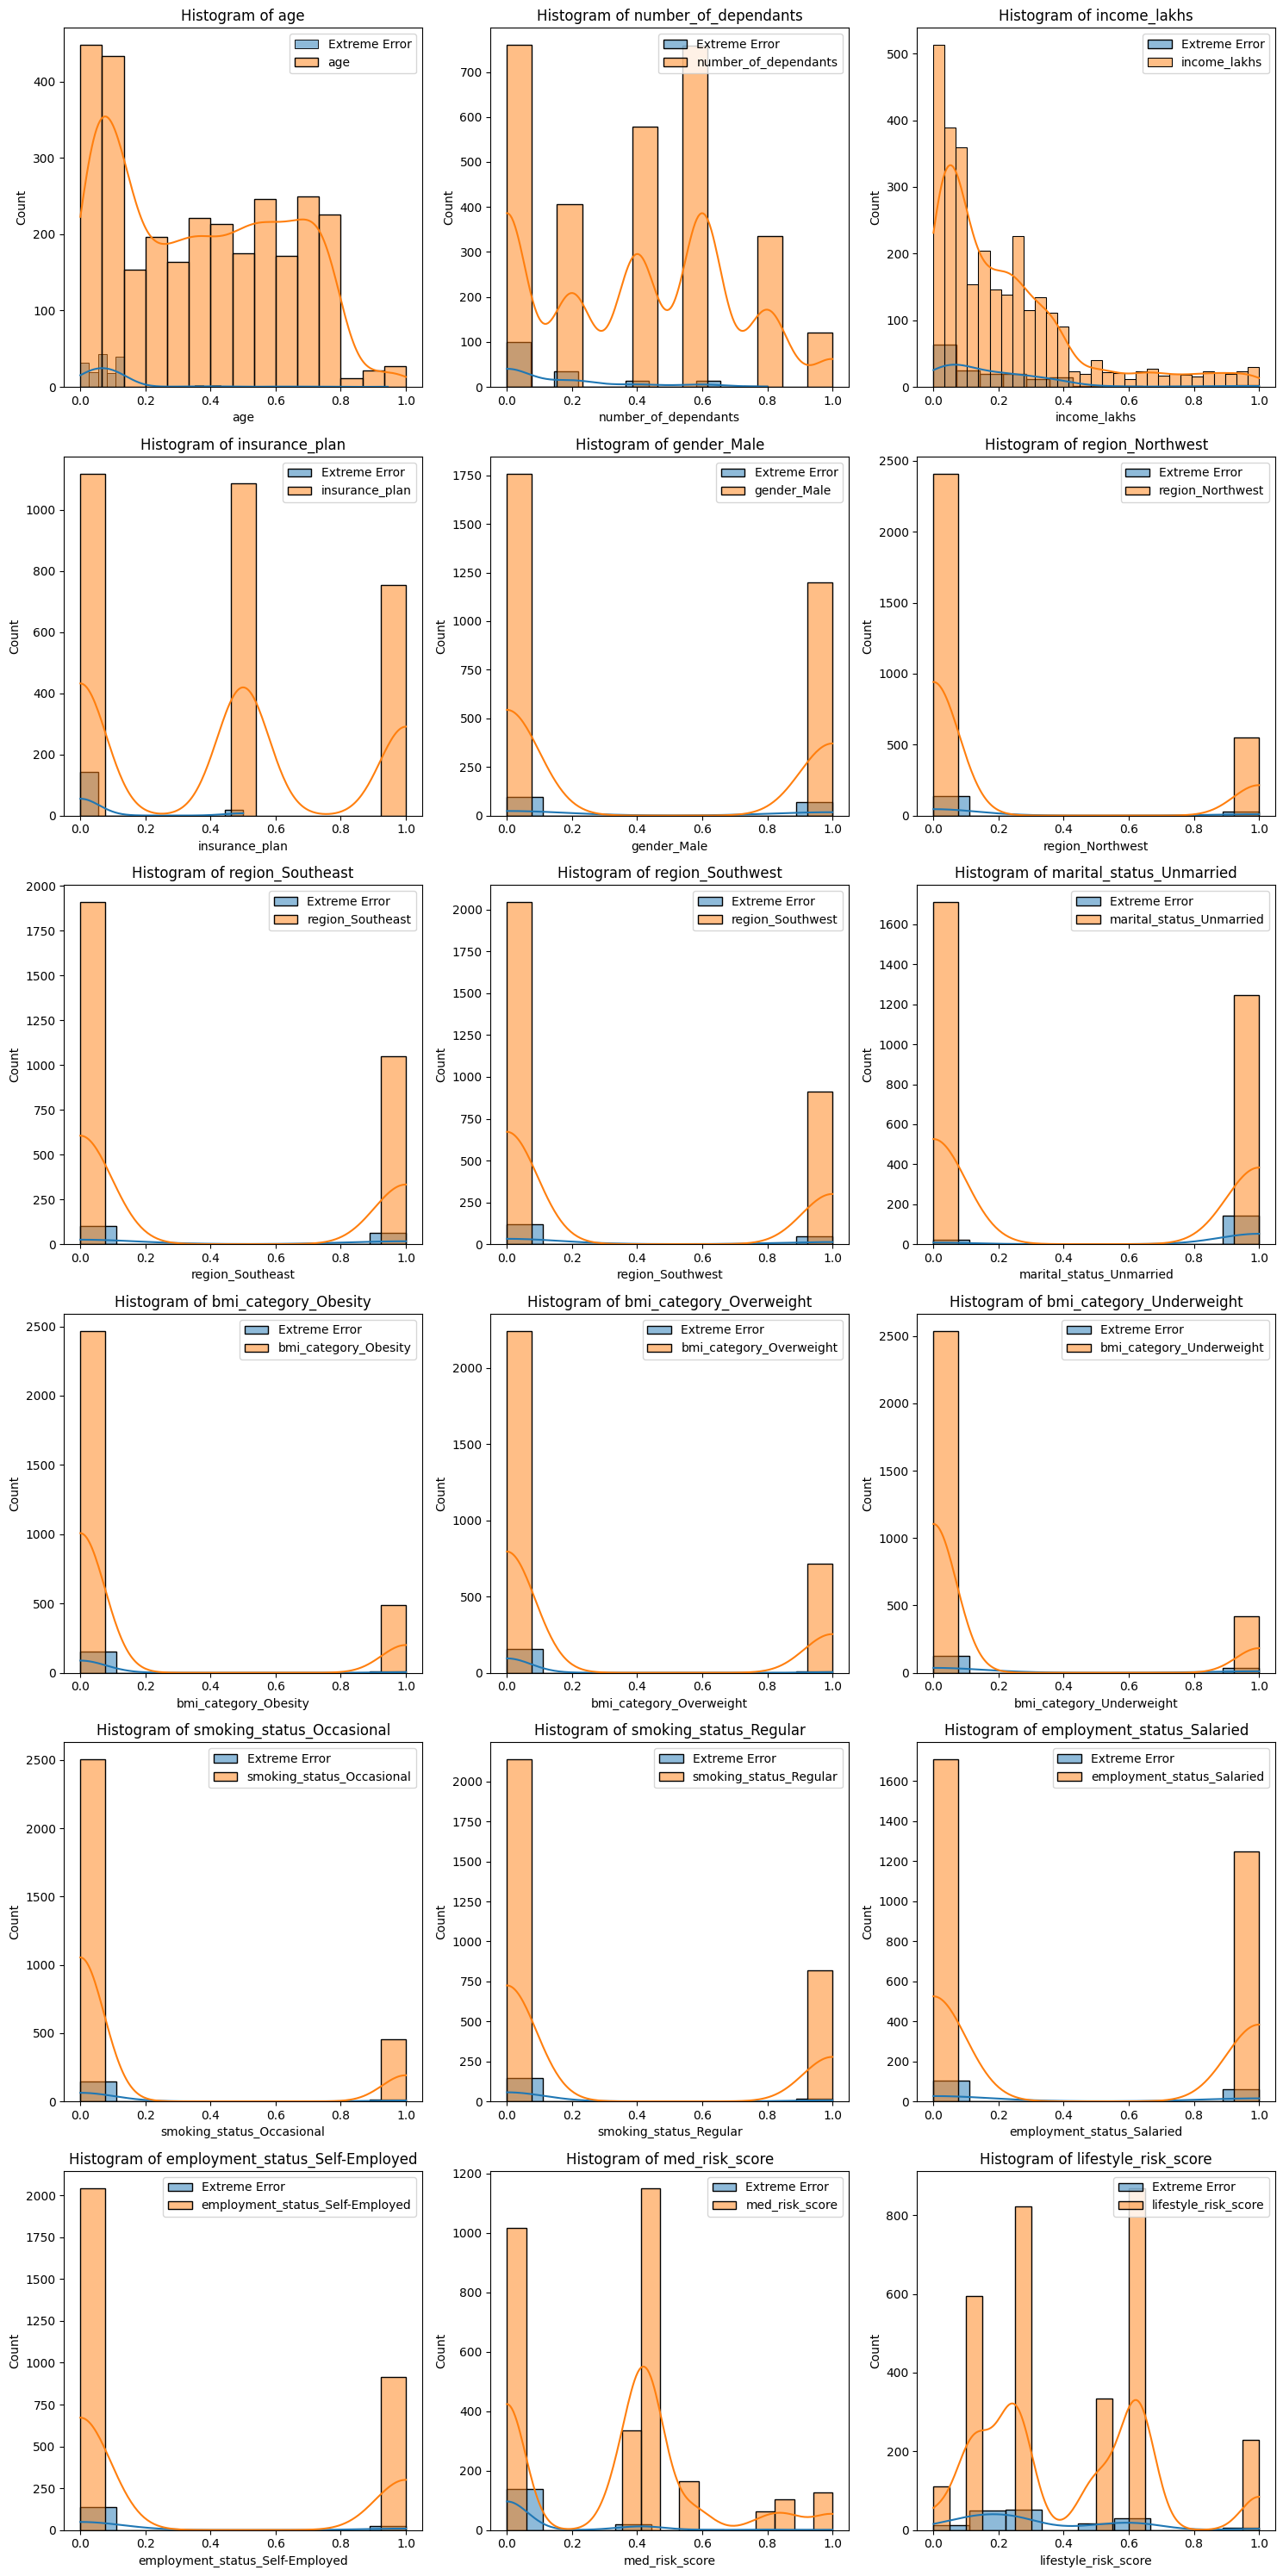

In [652]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns
cols = ['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan', 
        'gender_Male', 'region_Northwest', 'region_Southeast',
        'region_Southwest', 'marital_status_Unmarried', 'bmi_category_Obesity',
        'bmi_category_Overweight', 'bmi_category_Underweight',
        'smoking_status_Occasional', 'smoking_status_Regular',
        'employment_status_Salaried', 'employment_status_Self-Employed',
        'med_risk_score', 'lifestyle_risk_score']

# Set up the subplots (3 columns)
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols  # Calculate required number of rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()  # Flatten to easily index axes

# Plot histograms for each column
for i, col in enumerate(cols):
    sns.histplot(extreme_errors_df[col], kde=True, label="Extreme Error", ax=axes[i])
    sns.histplot(X_test[col], kde=True, label=col, ax=axes[i])
    axes[i].legend()
    axes[i].set_title(f"Histogram of {col}")

# Adjust layout
plt.tight_layout()
plt.show()


#### Here we can observe, in which of these charts does the feature not follow the same trend as the error, and try to solve the error

In [653]:
X_test.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'gender_Male', 'region_Northwest', 'region_Southeast',
       'region_Southwest', 'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed',
       'med_risk_score', 'lifestyle_risk_score'],
      dtype='object')